In [1]:
from keras.models import *
from losses import *
import matplotlib.pyplot as plt
%matplotlib inline

/home/bodong/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from augmentor.data_augmentation_chain_variable_input_size import DataAugmentationVariableInputSize
data_augmentation_chain = DataAugmentationVariableInputSize(512,
                                                            512,
                                                            random_brightness=(-48, 48, 0.5),
                                                            random_contrast=(0.5, 1.8, 0.5),
                                                            random_saturation=(0.5, 1.8, 0.5),
                                                            random_hue=(18, 0.5),
                                                            random_flip=0.5,
                                                            n_trials_max=3,
                                                            min_scale=0.6,
                                                            max_scale=2,
                                                            min_aspect_ratio = 0.8,
                                                            max_aspect_ratio = 1.2,
                                                            clip_boxes=True,
                                                            overlap_criterion='area',
                                                            bounds_box_filter=(0.3, 1.0),
                                                            bounds_validator=(0.5, 1.0),
                                                            n_boxes_min=1,
                                                            background=(0,0,0))

In [3]:
# import argparse
# from datetime import date, timedelta
# import keras
# import keras.backend as K
# from keras.optimizers import Adam, SGD
# import keras.preprocessing.image
# import os
# import sys
# import tensorflow as tf


def create_generators(pascal_path=None,random_transform=True,dataset_type='pascal',multi_scale=False):
    """
    Create generators for training and validation.

    Args
        args: parseargs object containing configuration for generators.
        preprocess_image: Function that preprocesses an image for the network.
    """
    common_args = {
        'batch_size': 10,
        'input_size': 512,
    }
    coco_path = '/opt/train_data/COCO_data/'
    from generators_bodong.coco import CocoGenerator
    train_generator = CocoGenerator(
            coco_path,
            'train2017',
            transformations=[data_augmentation_chain],
            **common_args
        )

    validation_generator = CocoGenerator(
        coco_path,
        'val2017',
        shuffle_groups=False,
        **common_args
    )

    return train_generator, validation_generator

In [4]:
train_generator, validation_generator = create_generators(dataset_type='coco')

loading annotations into memory...
Done (t=14.92s)
creating index...
index created!
loading annotations into memory...
Done (t=0.39s)
creating index...
index created!


In [5]:
from eval.coco import evaluate_coco
# use prediction model for evaluation
evaluate_coco(validation_generator, prediction_model)

NameError: name 'prediction_model' is not defined

In [1]:
data = train_generator.__getitem__(1)

NameError: name 'train_generator' is not defined

In [7]:
inp, hm_input, wh_input,wh_mask_input, reg_input, reg_mask_input, index_input = data[0]

In [22]:
k =1

In [23]:
reg_mask_input[k]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [24]:
wh_mask_input[k]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [33]:
reg_input.shape

(10, 100, 2)

In [13]:
wh_input[k]

array([[ 64.64708  ,  80.30433  ],
       [ 43.331944 , 101.204926 ],
       [ 16.154692 ,   5.4394946],
       [  7.5040727,  13.612892 ],
       [ 11.914312 ,  12.878863 ],
       [  8.654664 ,  13.481451 ],
       [  4.6346946,  18.919777 ],
       [  7.5384517,   9.425084 ],
       [  0.       ,   0.       ],
       [  0.       ,   0.       ],
       [  0.       ,   0.       ],
       [  0.       ,   0.       ],
       [  0.       ,   0.       ],
       [  0.       ,   0.       ],
       [  0.       ,   0.       ],
       [  0.       ,   0.       ],
       [  0.       ,   0.       ],
       [  0.       ,   0.       ],
       [  0.       ,   0.       ],
       [  0.       ,   0.       ],
       [  0.       ,   0.       ],
       [  0.       ,   0.       ],
       [  0.       ,   0.       ],
       [  0.       ,   0.       ],
       [  0.       ,   0.       ],
       [  0.       ,   0.       ],
       [  0.       ,   0.       ],
       [  0.       ,   0.       ],
       [  0.       ,

In [14]:
set(np.reshape(np.argmax(hm_input[k], axis=-1),(-1,)).tolist())

{0, 65, 75}

In [15]:
index_input[k]

array([ 5187.,  7348.,   556., 10204.,  5544.,  3039., 15062., 14299.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.], dtype=float32)

In [16]:
k1 = 0

In [17]:
idx = int(index_input[k][k1])

In [18]:
print idx//128, idx%128

40 67


In [19]:
hm_input[k].reshape((128*128,num_classes))[idx,:]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
y_, x_ = idx//128*4, idx%128*4
w,h = wh_input[k][k1]*4
bbox = [x_-w//2,y_-h//2,x_+w//2,y_+h//2]


[192.0, 154.0, 240.0, 206.0]
74 clock
[255.0, 413.0, 305.0, 507.0]
0 person
[288.0, 454.0, 344.0, 506.0]
0 person
[266.0, 375.0, 278.0, 401.0]
0 person
[247.0, 369.0, 257.0, 391.0]
0 person
[147.0, 360.0, 149.0, 368.0]
0 person
[131.0, 357.0, 133.0, 363.0]
0 person


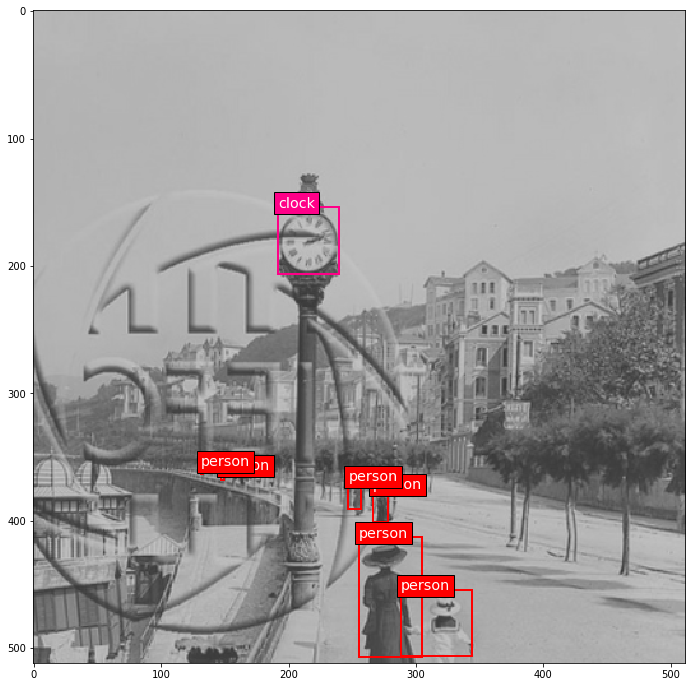

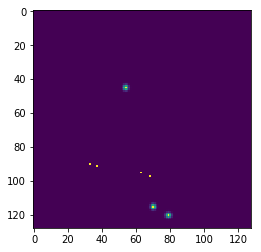

In [16]:
k =9
plt.figure(figsize=(20,12))
plt.imshow(inp[k]+0.5)
colors = plt.cm.hsv(np.linspace(0, 1, 80+1)).tolist() # Set the colors for the bounding boxes
classes = train_generator.labels
current_axis = plt.gca()
# # Draw the ground truth boxes in green (omit the label for more clarity)
# for box in batch_labels[i]:
#     xmin = box[1]
#     ymin = box[2]
#     xmax = box[3]
#     ymax = box[4]
#     label = '{}'.format(classes[int(box[0])])
#     current_axis.add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color='green', fill=False, linewidth=2))  
#     #current_axis.text(xmin, ymin, label, size='x-large', color='white', bbox={'facecolor':'green', 'alpha':1.0})

# Draw the predicted boxes in blue
cls = np.reshape(np.argmax(hm_input[k], axis=-1),(-1,)).tolist()
for k1 in range(0,100):
    if reg_mask_input[k][k1] == 0:
        break
    idx = int(index_input[k][k1])
    y_, x_ = idx//128*4, idx%128*4
    w,h = wh_input[k][k1]*4
    box = [x_-w//2,y_-h//2,x_+w//2,y_+h//2]
    print box
    xmin = box[-4]
    ymin = box[-3]
    xmax = box[-2]
    ymax = box[-1]
    color = colors[int(cls[idx])]
    print int(cls[idx]),classes[int(cls[idx])]
    label = '{}'.format(classes[int(cls[idx])])
    current_axis.add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color=color, fill=False, linewidth=2))  
    current_axis.text(xmin, ymin, label, size='x-large', color='white', bbox={'facecolor':color, 'alpha':1.0})
    
plt.figure()
plt.imshow(np.max(hm_input[k],axis=-1))

In [26]:
train_generator.label_to_name(1)

u'bicycle'

In [27]:
result = debug_model.predict(inp[k:k+1])

In [29]:
result[0].shape

(1, 128, 128, 80)

In [30]:
result[1].shape

(1, 128, 128, 2)

In [31]:
result[2].shape

(1, 128, 128, 2)

In [33]:
result[0][:,:,14].max()

0.0061999857

In [40]:
np.max(result[0][0])

0.09821567

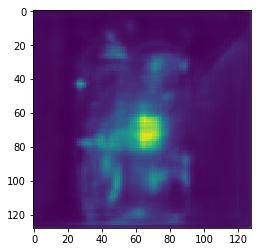

In [39]:
plt.imshow(np.max(result[0][0], axis=-1))

In [110]:
result[1][k][63,65,:]

IndexError: index 3 is out of bounds for axis 0 with size 1

In [89]:
import numpy as np
def focal_loss(hm_pred, hm_true):
    pos_mask = hm_true==1
    neg_mask = hm_true<1
    neg_weights = np.power(1 - hm_true, 4)

    pos_loss = -np.log(np.clip(hm_pred, 1e-4, 1. - 1e-4)) * np.power(1 - hm_pred, 2) * pos_mask
    neg_loss = -np.log(np.clip(1 - hm_pred, 1e-4, 1. - 1e-4)) * np.power(hm_pred, 2) * neg_weights * neg_mask

    num_pos = np.sum(pos_mask)
    pos_loss = np.sum(pos_loss)
    neg_loss = np.sum(neg_loss)
    if num_pos > 0:
        
        cls_loss = (pos_loss + neg_loss) / num_pos
    else:
        cls_loss = neg_loss
    return cls_loss


def reg_l1_loss(y_pred, y_true, indices, mask):
    b, h, w, c = y_pred.shape
    k = indices.shape[1]
    y_pred = np.reshape(y_pred, (h*w, c))
    ii = np.tile(np.range(b)[:, np.newaxis], (1, k))
    idx = np.stack([ii, indices], axis=-1)
    y_pred = np.gather_nd(y_pred, idx)
    mask = np.tile(mask[..., np.newaxis], (1, 1, 2))
    total_loss = np.reduce_sum(np.abs(y_true * mask - y_pred * mask))
    reg_loss = total_loss / (np.sum(mask) + 1e-4)
    return reg_loss


def loss(args):
    hm_pred, wh_pred, reg_pred, hm_true, wh_true, reg_true, reg_mask, indices = args
    hm_loss = focal_loss(hm_pred, hm_true)
    wh_loss = 0.1 * reg_l1_loss(wh_pred, wh_true, indices, reg_mask)
    reg_loss = reg_l1_loss(reg_pred, reg_true, indices, reg_mask)
    total_loss = hm_loss + wh_loss + reg_loss
    return total_loss


In [90]:
focal_loss(result[0], hm_input[k:k+1])

31.119937896728516

In [111]:
hm_input[k].reshape((128*128,20))[8130,:]

array([0.      , 0.      , 0.992218, 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      ], dtype=float32)

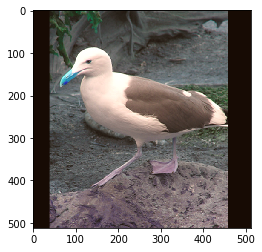

In [100]:
plt.imshow(inp[k]/256+0.5)
